In [30]:
#pip install tensorflow
import tensorflow

In [41]:
#Load sample dataset from tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

<IPython.core.display.Javascript object>

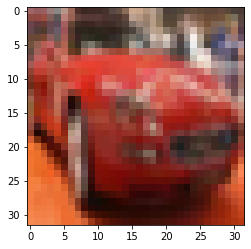

In [20]:
#Let's see how our images look like right now:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

plt.imshow(X_train[5])
plt.show()

In [21]:
#Scaling our CNN
X_train = X_train / 255
X_test = X_test / 255

# Simple Self-Made CNN

In [44]:
#First steps in using CNNs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [12]:
def network():
    cnet = Sequential()
    cnet.add(Conv2D(filters=32, padding='same', activation='relu', kernel_size=3, input_shape=(32,32,3)))
    cnet.add(BatchNormalization())
    
    cnet.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
    cnet.add(BatchNormalization())
    cnet.add(MaxPooling2D(pool_size=2, strides=2))
    cnet.add(Dropout(0.05))
    
    cnet.add(Flatten())
    
    cnet.add(Dense(128, activation='relu'))
    cnet.add(Dense(10, activation='softmax'))
    
    return cnet

In [13]:
cnet = network()

In [14]:
cnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [15]:
cnet.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

<IPython.core.display.Javascript object>

In [21]:
#Automatically save the best model
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=2)
]

<IPython.core.display.Javascript object>

In [23]:
history = cnet.fit(X_train,
                    y_train, 
                    epochs=600,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks)

Epoch 1/600
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5894 - accuracy: 0.4501 - val_loss: 1.2522 - val_accuracy: 0.5664
Epoch 2/600
1563/1563 [==============================] - 140s 89ms/step - loss: 0.9439 - accuracy: 0.6703 - val_loss: 1.4198 - val_accuracy: 0.5629
Epoch 3/600
1563/1563 [==============================] - 132s 85ms/step - loss: 0.7605 - accuracy: 0.7358 - val_loss: 1.0331 - val_accuracy: 0.6416
Epoch 4/600
1563/1563 [==============================] - 118s 75ms/step - loss: 0.6261 - accuracy: 0.7837 - val_loss: 0.9856 - val_accuracy: 0.6779
Epoch 5/600
1563/1563 [==============================] - 120s 77ms/step - loss: 0.5102 - accuracy: 0.8249 - val_loss: 1.0466 - val_accuracy: 0.6676
Epoch 6/600
1563/1563 [==============================] - 125s 80ms/step - loss: 0.4040 - accuracy: 0.8596 - val_loss: 1.1189 - val_accuracy: 0.6684


<IPython.core.display.Javascript object>

<AxesSubplot:>

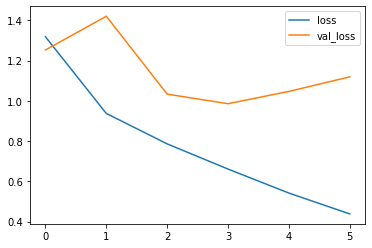

In [25]:
metrics = pd.DataFrame(history.history)
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

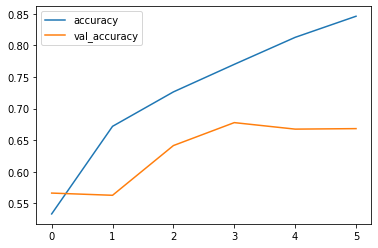

In [28]:
metrics[["accuracy","val_accuracy"]].plot()

In [29]:
#Saving model
cnet.save("model.h5")

In [ ]:
#Loading the model for further usage
load_saved_model = tf.keras.models.load_model("model.h5")
load_saved_model.summary()

# Transfer Learning CNN

In [65]:
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model, Sequential

X_train_new = preprocess_input(X_train)
y_train_new = to_categorical(y_train, 10)

X_test_new = preprocess_input(X_test)
y_test_new = to_categorical(y_test, 10)

target_size = (224, 224)

In [66]:
base_model = ResNet50(include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predict = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predict)

In [69]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [71]:
#Automatically save the best model
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = '/tmpnew/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=2)
]

<IPython.core.display.Javascript object>

In [72]:
history = model.fit(X_train_new,
                    y_train_new, 
                    epochs=20,
                    validation_data=(X_test_new,y_test_new))

Epoch 1/20
1563/1563 [==============================] - 287s 179ms/step - loss: 1.4066 - accuracy: 0.5458 - val_loss: 1.0300 - val_accuracy: 0.6405
Epoch 2/20
1563/1563 [==============================] - 268s 171ms/step - loss: 0.9175 - accuracy: 0.6772 - val_loss: 1.0014 - val_accuracy: 0.6512
Epoch 3/20
1563/1563 [==============================] - 266s 170ms/step - loss: 0.8321 - accuracy: 0.7050 - val_loss: 1.0012 - val_accuracy: 0.6621
Epoch 4/20
1563/1563 [==============================] - 252s 161ms/step - loss: 0.7477 - accuracy: 0.7352 - val_loss: 1.0181 - val_accuracy: 0.6648
Epoch 5/20
1563/1563 [==============================] - 257s 164ms/step - loss: 0.6788 - accuracy: 0.7590 - val_loss: 1.0398 - val_accuracy: 0.6630
Epoch 6/20
1563/1563 [==============================] - 252s 161ms/step - loss: 0.6273 - accuracy: 0.7778 - val_loss: 1.0939 - val_accuracy: 0.6554
Epoch 7/20
1563/1563 [==============================] - 264s 169ms/step - loss: 0.5633 - accuracy: 0.8013 - val_

In [73]:
#Saving model
model.save("model_resnet.h5")

<IPython.core.display.Javascript object>

<AxesSubplot:>

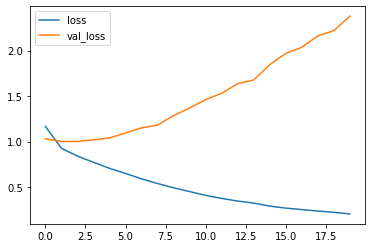

In [74]:
metrics = pd.DataFrame(history.history)
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

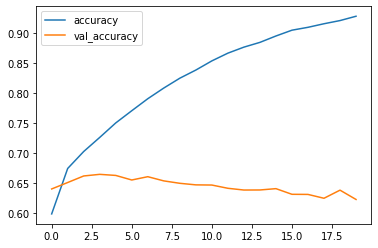

In [75]:
metrics[["accuracy","val_accuracy"]].plot()